In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline

In [2]:
df_tv_sales = pd.read_csv('tvmarketing.csv')
df_tv_sales

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [3]:
df_tv_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [4]:
print(df_tv_sales.isnull().sum())
df_tv_sales.duplicated().sum()


TV       0
Sales    0
dtype: int64


np.int64(0)

In [5]:
df_tv_sales['Sales'] = np.log(df_tv_sales['Sales'])
df_tv_sales


,TV,Sales
0,230.1,3.095578
1,44.5,2.341806
2,17.2,2.230014
3,151.5,2.917771
4,180.8,2.557227
...,...,...
195,38.2,2.028148
196,94.2,2.272126
197,177.0,2.549445
198,283.6,3.238678


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_tv_sales[['TV']], 
                                                    df_tv_sales[['Sales']], 
                                                    test_size=0.2, 
                                                    random_state=89
                                                    )

In [7]:
current_best_rec = -np.inf
current_best_degree = 1
current_best_model = None
current_best_polynomial = None

for degree in range(5, 21):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_test_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_test_pred)

    if r2 > current_best_rec:
        current_best_rec = r2
        current_best_degree = degree
    
    current_best_model = model
    
    current_best_polynomial = poly

print(f"\n Best Polynomial Degree: {current_best_degree}")
print(f" Best Test R² Score: {current_best_rec * 100:.2f}%")


 Best Polynomial Degree: 8
 Best Test R² Score: 73.92%


/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


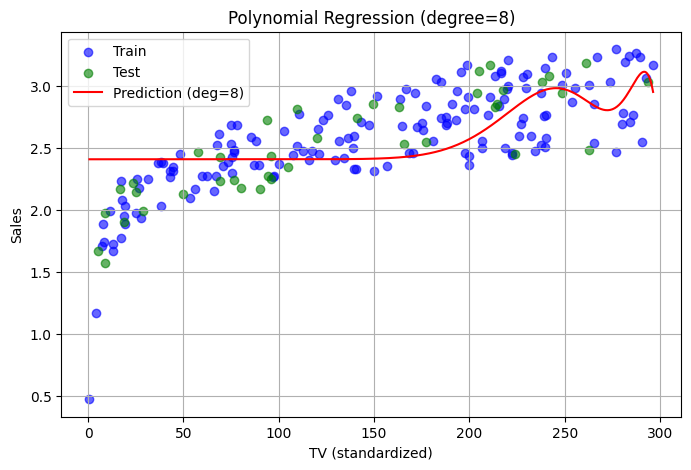

In [8]:
X_line = np.linspace(df_tv_sales['TV'].min(), df_tv_sales['TV'].max(), 500).reshape(-1, 1)
X_line_poly = current_best_polynomial.transform(X_line)
y_line = current_best_model.predict(X_line_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Train')
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Test')
plt.plot(X_line, y_line, color='red', label=f'Prediction (deg={current_best_degree})')
plt.title(f"Polynomial Regression (degree={current_best_degree})")
plt.xlabel("TV (standardized)")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()